<a href="https://colab.research.google.com/github/AchinthaThennakoon/deep-learning-tutorial/blob/main/Data_Augmentation_To_Handle_Overfitting_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
import pathlib

# Load data set

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
img_dir ='/content/drive/MyDrive/Colab Notebooks/DL/src'
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir=img_dir, untar=True)

228813984/228813984 [==============================] - 2s 0us/step


untar=true -> unzip file


In [ ]:
data_dir

'/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos'

In [ ]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos')

In [ ]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15674450867_0ced942941_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

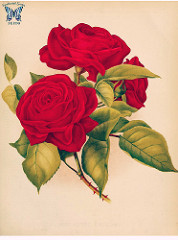

In [ ]:
PIL.Image.open(str(roses[0]))

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [ ]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [ ]:
flowers_images_dict['roses'][:5]

[PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/DL/src/datasets/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img

array([[[255, 254, 254],
        [248, 253, 252],
        [244, 250, 249],
        ...,
        [255, 249, 254],
        [255, 248, 254],
        [255, 248, 254]],

       [[127, 174, 225],
        [134, 191, 236],
        [127, 179, 219],
        ...,
        [152, 197, 234],
        [144, 198, 233],
        [144, 198, 233]],

       [[174, 202, 232],
        [163, 200, 228],
        [167, 204, 232],
        ...,
        [170, 207, 235],
        [173, 207, 237],
        [173, 207, 237]],

       ...,

       [[252, 245, 252],
        [253, 246, 253],
        [253, 246, 253],
        ...,
        [253, 249, 255],
        [249, 245, 251],
        [249, 245, 251]],

       [[254, 247, 254],
        [254, 247, 254],
        [253, 246, 253],
        ...,
        [251, 243, 253],
        [252, 248, 254],
        [252, 248, 254]],

       [[249, 246, 255],
        [248, 245, 254],
        [248, 245, 254],
        ...,
        [254, 245, 255],
        [250, 243, 255],
        [250, 243, 255]]

In [ ]:
cv2.imshow(img)

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow
